In [1]:
#imports
import copy
from json import load
import os
import pandas as pd
import csv
import subprocess
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [2]:
#Q1
sample = 11/7
type1 = type(sample)
type1

float

In [3]:
#Q2
fruit_list = ["apple", "pear", "banana", "watermelon"]
fruit_list_length = len(fruit_list) # Don't hardcode this. Use a Python built-in

minimum = 2
maximum = 5
in_range = (minimum < fruit_list_length < maximum) # True if the number of fruits in fruit_list is inside the minimum-to-maximum range
in_range


True

In [4]:
#Q3 sus, ask about this
filepaths = "TESTING_FILE1.C5V-TESTING_FILE2.CSV-TESTING_FILE3.CSV"
file_list = filepaths.split("-")
csv_count = 0

for file in file_list:
    if file_list[1][13:17] in file:
        csv_count += 1
csv_count

2

In [5]:
#Q4
def multiply(a, b=2):
    return a*b
multiply(5)

10

In [6]:
def smart_multiply(lis):
    value = 1
    for nums in lis:
        if nums <= 0:
            continue
        value *= nums
        if value > 100:
            break
    return value
    
#https://stackoverflow.com/questions/62742648/given-a-list-of-numbers-return-the-products-of-all-the-elements-in-the-list
#used this link for support

In [7]:
#Q5
smart_multiply([4, -2, 0, 5, 5, 2, 7, -2])

200

In [8]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]


In [9]:
#Q6 insert z into rows
coord1["z"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [10]:
#Q7
rows[2][2]["y"]

1

In [11]:
#Q8
import copy
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [12]:
#Q9
header.index("A")
sum_a = 0
for row in rows:
    sum_a += row[0]
sum_a

9

In [13]:
#example
def get_column_a(row):
    print("lookup A column for a row")
    return row[header.index("A")]

rows.sort(key=get_column_a, reverse=False)
rows


lookup A column for a row
lookup A column for a row
lookup A column for a row


[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [14]:
#Q10
def get_column_b(row):
    return row[header.index("B")]

rows.sort(key=get_column_b, reverse=True)
rows


[[3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [15]:
import json
f = open("usd.json")
data = f.read()
f.close()

print(type(data))
print(data[:300] + "...")

<class 'str'>
{"aud":{"code":"AUD","alphaCode":"AUD","numericCode":"036","name":"Australian Dollar","rate":1.4960167988076,"date":"Thu, 12 Sep 2024 15:55:11 GMT","inverseRate":0.66844169182929},"cad":{"code":"CAD","alphaCode":"CAD","numericCode":"124","name":"Canadian Dollar","rate":1.3577198141968,"date":"Thu, 1...


In [16]:
#Q11
json.load(open("usd.json"))["cad"]["rate"]*400

543.08792567872

In [17]:
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        print("Could not convert string to int.")
        return None
    except Exception:
        print("Error with your input argument.")
        return None

In [18]:
#Q12
convert_to_int("320")

320

In [19]:
#Q13
convert_to_int("ninety-nine")

Could not convert string to int.


In [20]:
#Q14
convert_to_int([3, 2, 0])

Error with your input argument.


In [21]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#Q15
grades = {}
data = "grade-data"
files = os.listdir(data)

for file in files:
    if file.endswith(".csv"):
        year = int(file.split("-")[-1].split(".")[0])
        df = pd.read_csv(os.path.join(data, file))
        df.set_index("course", inplace=True)
        grades[year] = df
        
keys = sorted(list(grades.keys()))
keys   

[2017, 2018, 2019, 2020, 2021, 2022]

In [23]:
#Q16 What was the average GPA for COMP SCI 320 in 2022?
df_2022 = grades[2022]
df_2022.at["COMP SCI 320", "gpa"] # iat works like df_2022.iloc[, 6], but is faster for one cell

3.325888236842226

In [24]:
#Q17 How many computer sciences classes were offered in 2022?
df_2022 = grades[2022]
cs_classes_2022 = df_2022.loc[df_2022["course_subject"] == "Computer Sciences"]
len(cs_classes_2022)


91

In [25]:
#Q18 How many students received an "A" in computer sciences courses in 2022?
sum(cs_classes_2022["a_count"])

8479

In [26]:
#Q19 Calculate the fraction of students who received an "A" in each computer sciences class in 2022.
#Then return the smallest value from this computation.

(cs_classes_2022["a_count"]/cs_classes_2022["total"]).min()

0.18181818181818182

In [27]:
#Q20: What fraction of students in computer sciences courses numbered 300 to 399 received an "A" in 2022?
course_300_399 = cs_classes_2022.loc[(cs_classes_2022["course_num"] >= 300) & (cs_classes_2022["course_num"] <= 399)]
course_300_399_fraction = (course_300_399["a_count"]/course_300_399["total"]).to_dict()
course_300_399_fraction

{'COMP SCI 300': 0.4683698296836983,
 'COMP SCI 304': 0.8835616438356164,
 'COMP SCI 310': 0.345679012345679,
 'COMP SCI 319': 0.6567164179104478,
 'COMP SCI 320': 0.33044554455445546,
 'COMP SCI 352': 0.29277566539923955,
 'COMP SCI 354': 0.20095238095238097}

Text(0.5, 1.0, "Fraction of Students Receiving an 'A' in Each Computer Sciences Course (2022)")

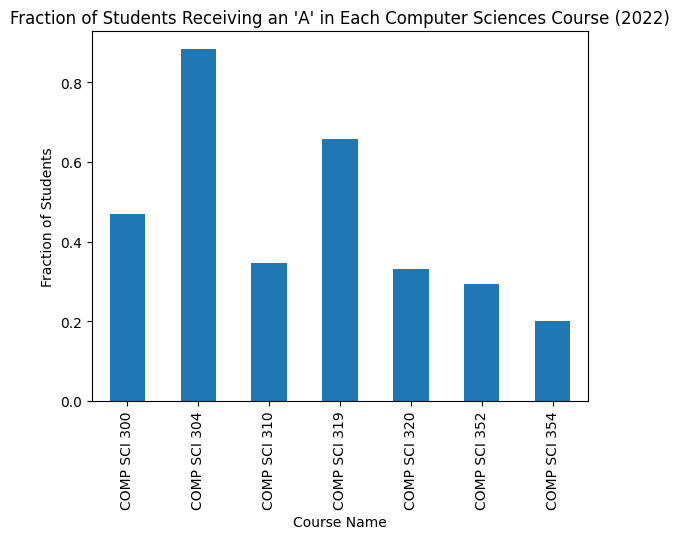

In [28]:
#Q21 Same question as Q20, but answer with a bar plot instead of a dict.
course_300_399_percent = course_300_399["a_count"]/course_300_399["total"]
course_300_399_percent.plot.bar()
plt.xlabel("Course Name")
plt.ylabel("Fraction of Students")
plt.title("Fraction of Students Receiving an 'A' in Each Computer Sciences Course (2022)")

Text(0.5, 1.0, 'Number of Students Enrolled COMP SCI 300 Over Time')

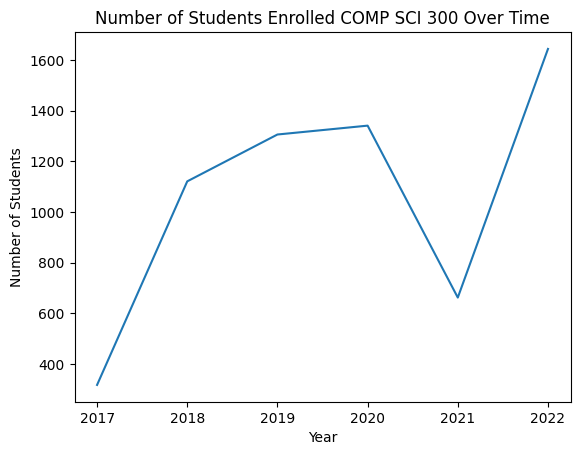

In [29]:
#Q22 How has the number of students taking COMP SCI 300 changed over recent years?
cs_300_years = {}
for year in keys:
    cs_300_years[year] = grades[year].at["COMP SCI 300", "total"]
    
cs_300_years_pd = pd.Series(cs_300_years)
cs_300_years_pd.plot()
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Number of Students Enrolled COMP SCI 300 Over Time')

Text(0.5, 1.0, "Number of Students Earning an 'A' vs. Number of Students")

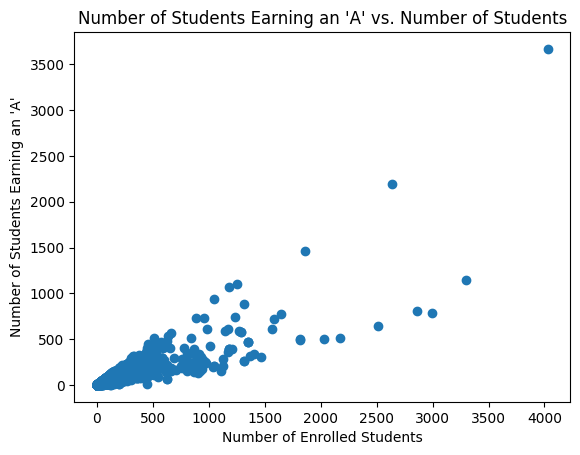

In [30]:
#Q23 What is the relationship between number of students who receive an "A" and GPA of a course for 2022?
a_2022 = df_2022[["total","a_count"]]
plt.scatter(a_2022["total"], a_2022["a_count"])
plt.xlabel("Number of Enrolled Students")
plt.ylabel("Number of Students Earning an 'A'")
plt.title("Number of Students Earning an 'A' vs. Number of Students")